## Annotate Comics/Manga
Download comictextdetector.pt and put it into data directory.
Run next block to generate following annotations for data\examples\AisazuNihaIrarenai-003.jpg:
- AisazuNihaIrarenai-003.txt: yolo format bounding boxes of english&japanese text block bounding boxes. 0 is eng.
- mask-AisazuNihaIrarenai-003.png
- line-AisazuNihaIrarenai-003.txt: icdar format bboxes of text lines.

In [1]:
!pip install opencv-python
!apt-get update
!apt-get install ffmpeg libsm6 libxext6  -y
# !pip install -r requirements.txt
!pip install pyclipper
!pip install shapely
!pip install matplotlib
!pip install torchsummary

done.
Setting up libxdamage1:amd64 (1:1.1.4-3) ...
Setting up libxext6:amd64 (2:1.3.3-1) ...
Setting up libxfixes3:amd64 (1:5.0.3-1) ...
Setting up libxss1:amd64 (1:1.2.2-1) ...
Setting up libgdk-pixbuf2.0-0:amd64 (2.36.11-2) ...
Setting up libgdk-pixbuf2.0-bin (2.36.11-2) ...
Setting up libvdpau1:amd64 (1.1.1-3ubuntu1) ...
Setting up libpulse0:amd64 (1:11.1-1ubuntu7.11) ...
Setting up libegl1:amd64 (1.0.0-2ubuntu2.3) ...
Setting up libxcursor1:amd64 (1:1.1.15-1) ...
Setting up va-driver-all:amd64 (2.1.0-3) ...
Setting up libpango-1.0-0:amd64 (1.40.14-1ubuntu0.1) ...
Setting up libwayland-egl1-mesa:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Setting up libxv1:amd64 (2:1.0.11-1) ...
Setting up libxxf86vm1:amd64 (1:1.1.4-1) ...
Setting up libva-x11-2:amd64 (2.1.0-3) ...
Setting up libxrandr2:amd64 (2:1.5.1-1) ...
Setting up libglx-mesa0:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Setting up libxi6:amd64 (2:1.7.9-1) ...
Setting up libcairo2:amd64 (1.15.10-2ubuntu0.1) ...
Setting up libxinerama1:amd64 (2:

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import cv2
from PIL import Image
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import os
import glob

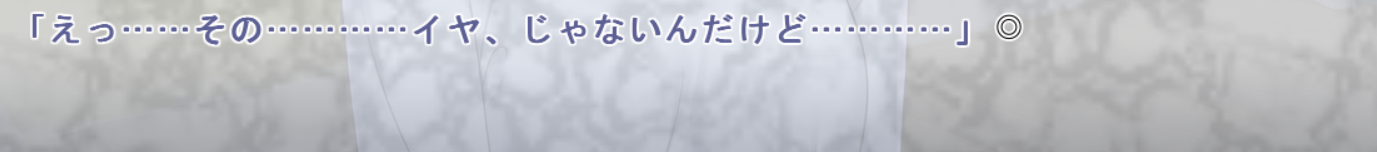

In [4]:
Image.open("/workspace/testyolodetector/comic-text-detector/data/examples/data/imagePython/atelier/atelier2.png")

In [5]:
root_image_folder = "/workspace/testyolodetector/comic-text-detector/data/examples/data/imagePython"
out_dir = "/workspace/testyolodetector/comic-text-detector/data/examples/data/grayscaled"
subfolders  = [name for name in os.listdir(root_image_folder) if os.path.isdir(os.path.join(root_image_folder, name))]
for image_folder in subfolders:
    images = glob.glob(os.path.join(root_image_folder, image_folder, "*.png"))
    out_image_folder = os.path.join(out_dir, image_folder)
    if not os.path.isdir(out_image_folder):
        os.mkdir(out_image_folder)
    for image_path in images:
        img = cv2.imread(image_path, 0)
        splitted = image_path.split("/")
        
        out_image_path = os.path.join(out_image_folder, splitted[-1].split(".")[0] + "mask.png")
        cv2.imwrite(out_image_path, img)
# image = cv2.imread("/workspace/testyolodetector/comic-text-detector/data/examples/data/imagePython/atelier/atelier2.png", 0)

# plt.imshow(image)
# plt.show(), image.shape

In [7]:
import numpy as np


In [1]:
from inference import model2annotations

img_dir = r'data/examples'
model_path = r'data/comictextdetector.pt'
# img_dir = [os.path.join(root_image_folder,image_folder) for image_folder in subfolders]                              # can be dir list
img_dir = "/workspace/testyolodetector/comic-text-detector/data/examples"
save_dir = r'data/examples/annotations'
model2annotations(model_path, img_dir, save_dir, save_json=False)

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
0it [00:00, ?it/s]


In [9]:
import os
from PIL import Image
import torch
image_name = "image1.png"
Image_dir = "/workspace/testyolodetector/comic-text-detector/data/examples"
annotation_dir = "/workspace/testyolodetector/comic-text-detector/data/examples/annotations"
image_annotation_path = os.path.join(annotation_dir, image_name[:-4] + ".txt")
image_path = os.path.join(Image_dir, image_name)
image = Image.open(image_path)
with open (image_annotation_path, "r") as f:
    annotations = []
    for line in f:
        annotations.append(eval("["+",".join(line.strip().split(" "))+"]"))
bboxs = torch.tensor(annotations)

In [10]:
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b
def plot_results(pil_img, boxes):
    plt.figure(figsize=(26,20))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for (xmin, ymin, xmax, ymax), c in zip( boxes.tolist(), colors):
        
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
    plt.axis('off')
    plt.show()

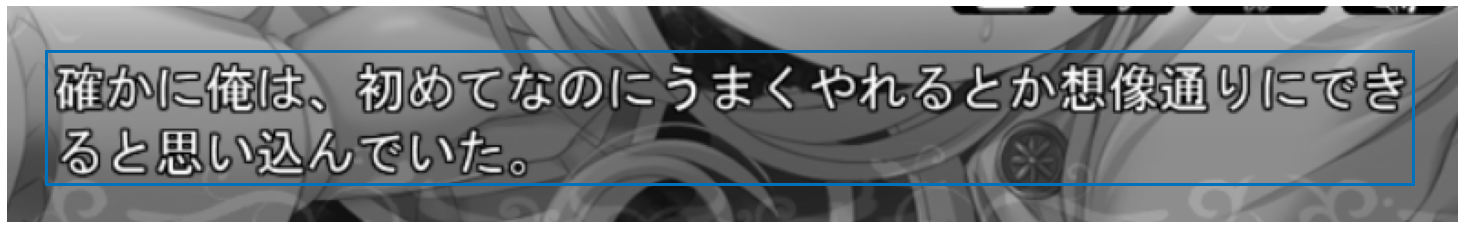

In [11]:
import numpy as np
import torch
import matplotlib.pyplot as plt
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]
bboxes_scaled = rescale_bboxes(
        bboxs[:,1:], image.size)

# plot results
image = image.convert("RGB")
plot_results(image, bboxes_scaled)

In [4]:
import os
from PIL import Image
import torch
image_name = "image1.png"
Image_dir = "/workspace/testyolodetector/comic-text-detector/data/examples"
annotation_dir = "/workspace/testyolodetector/comic-text-detector/data/examples/annotations"
image_annotation_path = os.path.join(annotation_dir, "line-" + image_name[:-4] + ".txt")
image_path = os.path.join(Image_dir, image_name)
image = Image.open(image_path)
with open (image_annotation_path, "r") as f:
    annotations = []
    for line in f:
        annotations.append(eval("["+",".join(line.strip().split(" "))+"]"))
bboxs = torch.tensor(annotations)

FileNotFoundError: [Errno 2] No such file or directory: '/workspace/testyolodetector/comic-text-detector/data/examples/image1.png'